In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Reading the data
data=pd.read_csv("/content/SPAM_message.csv")

In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Spam Message
data.Message.iloc[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [ ]:
#Ham Message
data.Message.iloc[4]

"Nah I don't think he goes to usf, he lives around here though"

Exploratory Data Analysis

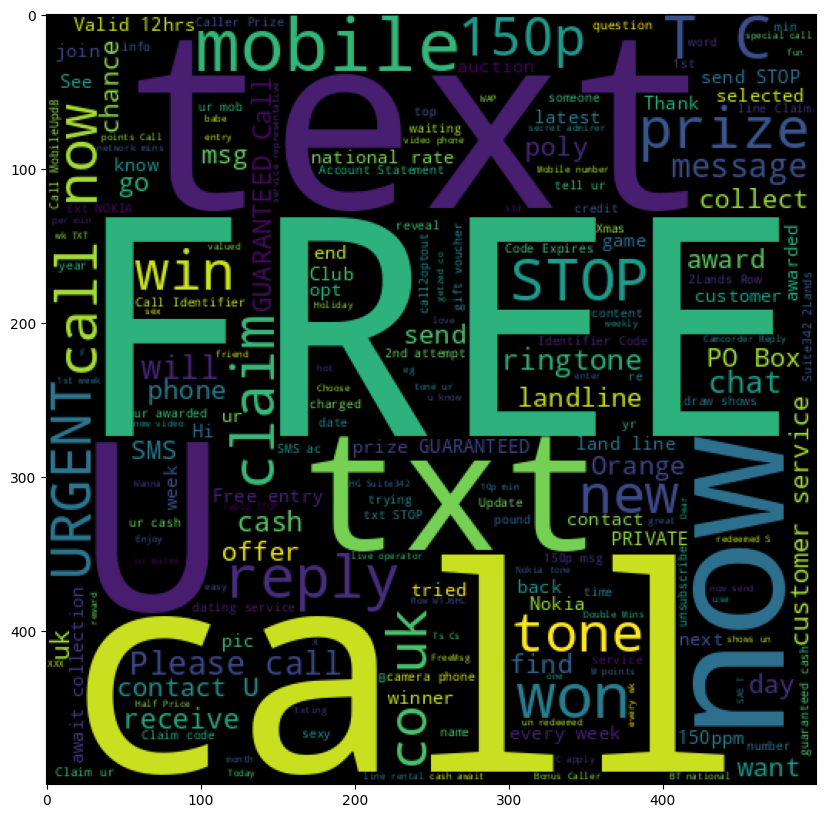

In [ ]:
# Visualize the Spam words

spam_words= ' '.join(list(data[data['Category']=='spam']['Message']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)
plt.show()

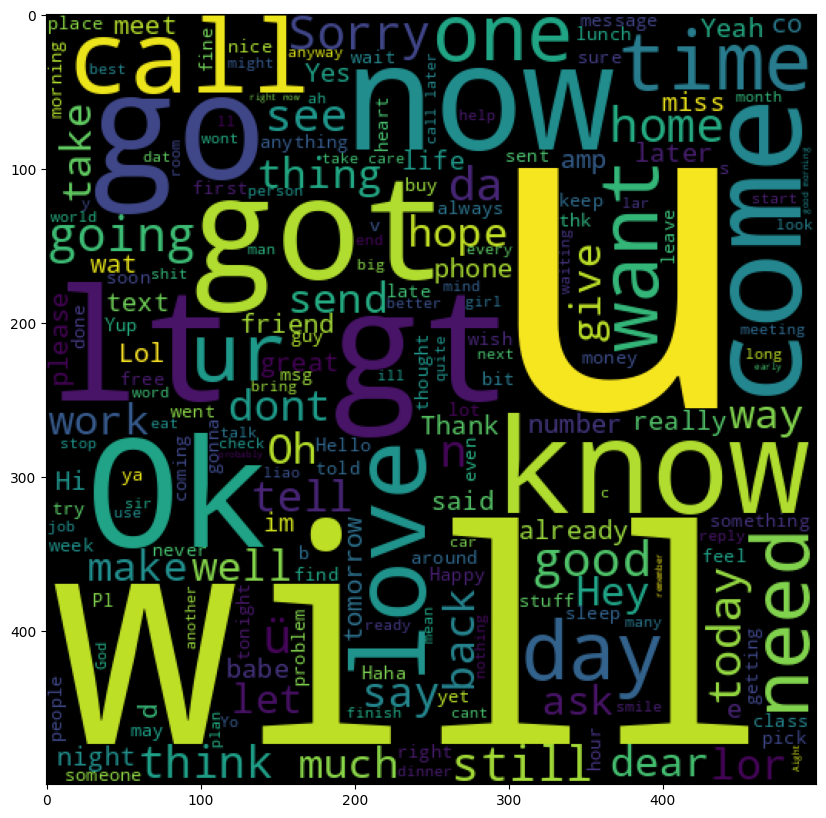

In [ ]:
# Visualize the Ham words

spam_words= ' '.join(list(data[data['Category']=='ham']['Message']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)
plt.show()

# Text Preparation

In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.shape

(5572, 2)

In [ ]:
data['Message'].loc[345]

'My sister cleared two round in birla soft yesterday.'

In [ ]:
!pip install nltk

In [ ]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['Message'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

# Feature Engineering

In [ ]:
#Creating Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=4000)
X = cv.fit_transform(corpus).toarray()

In [ ]:
#Labell Encoding
y=pd.get_dummies(data['Category'])
y=y.iloc[:,1].values

# Modelling
# Machine Learning Approach

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
#step 1: Import the model
from sklearn.naive_bayes import MultinomialNB
#step 2: Create the object of algorithm
MNB=MultinomialNB()
#step 3: Train the model
MNB.fit(xtrain,ytrain)
#step 4: Prediction
ypred=MNB.predict(xtest)
#step 5: Checking the performance
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
ac=accuracy_score(ytest,ypred)
print(f"Accuracy score:{ac}\n{cm}\n{cr}")

Accuracy score:0.986244019138756
[[1439   12]
 [  11  210]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1451
           1       0.95      0.95      0.95       221

    accuracy                           0.99      1672
   macro avg       0.97      0.97      0.97      1672
weighted avg       0.99      0.99      0.99      1672



# Feature Engineering

In [ ]:
# Creating the TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=4500)
X = tv.fit_transform(corpus).toarray()

# Modelling

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
#step 1: Import the model
from sklearn.naive_bayes import MultinomialNB
#step 2: Create the object of algorithm
MNB=MultinomialNB()
#step 3: Train the model
MNB.fit(xtrain,ytrain)
#step 4: Prediction
ypred=MNB.predict(xtest)
#step 5: Checking the performance
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
ac=accuracy_score(ytest,ypred)
print(f"Accuracy score:{ac}\n{cm}\n{cr}")

Accuracy score:0.986244019138756
[[1439   12]
 [  11  210]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1451
           1       0.95      0.95      0.95       221

    accuracy                           0.99      1672
   macro avg       0.97      0.97      0.97      1672
weighted avg       0.99      0.99      0.99      1672



#Deep Learning Approach

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
### Vocabulary size
voc_size=2500

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

[[1891,
  1667,
  1468,
  684,
  1592,
  1118,
  434,
  946,
  382,
  2212,
  1132,
  863,
  145,
  937,
  770,
  242],
 [92, 1762, 1779, 333, 1507, 439],
 [1535,
  253,
  1897,
  1902,
  1395,
  1883,
  1742,
  1816,
  311,
  1422,
  438,
  1589,
  1883,
  532,
  253,
  1640,
  782,
  952,
  498,
  236,
  188],
 [1507, 1779, 703, 2340, 1007, 1507, 236, 1760, 703],
 [1926, 1646, 679, 1268, 1043, 1762, 127],
 [821,
  1364,
  1218,
  662,
  124,
  628,
  180,
  2266,
  2123,
  133,
  92,
  108,
  782,
  658,
  855,
  83],
 [1037, 449, 180, 1973, 2467, 180, 1019, 541],
 [1839,
  2406,
  2189,
  2189,
  2241,
  1706,
  1205,
  2116,
  2342,
  1429,
  2000,
  996,
  664,
  759,
  1429],
 [1615,
  238,
  1875,
  1461,
  214,
  920,
  1766,
  2119,
  733,
  1786,
  733,
  776,
  1290,
  1957,
  501],
 [2349,
  2340,
  1507,
  2320,
  287,
  1758,
  992,
  41,
  2349,
  505,
  1535,
  1786,
  2349,
  1758,
  598,
  1535],
 [2211, 1549, 764, 2199, 766, 2176, 2126, 832, 326, 67, 1879, 448],
 [23

In [ ]:
onehot_repr[1]

[92, 1762, 1779, 333, 1507, 439]

In [ ]:
sent_length=25
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[1891 1667 1468 ...    0    0    0]
 [  92 1762 1779 ...    0    0    0]
 [1535  253 1897 ...    0    0    0]
 ...
 [ 190 1462  792 ...    0    0    0]
 [ 176 1666  120 ...    0    0    0]
 [1901 1959 2236 ...    0    0    0]]


In [ ]:
embedded_docs[1]

array([  92, 1762, 1779,  333, 1507,  439,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int32)

In [ ]:
## Creating model
embedding_vector_features=40 ##features representation
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 25, 40)            100000    
                                                                 
 lstm_3 (LSTM)               (None, 100)               56400     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 156501 (611.33 KB)
Trainable params: 156501 (611.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
len(embedded_docs),y.shape

(5572, (5572,))

In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((5572, 25), (5572,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=0)

In [ ]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=25,batch_size=2500)

Epoch 1/25
2/2 [==============================] - 7s 2s/step - loss: 0.6970 - accuracy: 0.4051 - val_loss: 0.6734 - val_accuracy: 0.8678
Epoch 2/25
2/2 [==============================] - 2s 706ms/step - loss: 0.6684 - accuracy: 0.8651 - val_loss: 0.6434 - val_accuracy: 0.8678
Epoch 3/25
2/2 [==============================] - 1s 690ms/step - loss: 0.6377 - accuracy: 0.8651 - val_loss: 0.6061 - val_accuracy: 0.8678
Epoch 4/25
2/2 [==============================] - 1s 681ms/step - loss: 0.5983 - accuracy: 0.8651 - val_loss: 0.5547 - val_accuracy: 0.8678
Epoch 5/25
2/2 [==============================] - 2s 942ms/step - loss: 0.5431 - accuracy: 0.8651 - val_loss: 0.4780 - val_accuracy: 0.8678
Epoch 6/25
2/2 [==============================] - 2s 703ms/step - loss: 0.4612 - accuracy: 0.8651 - val_loss: 0.3721 - val_accuracy: 0.8678
Epoch 7/25
2/2 [==============================] - 1s 698ms/step - loss: 0.3575 - accuracy: 0.8651 - val_loss: 0.3135 - val_accuracy: 0.8678
Epoch 8/25
2/2 [=======

In [ ]:
y_pred=model.predict(X_test)

53/53 [==============================] - 1s 8ms/step


In [ ]:
y_pred=np.where(y_pred > 0.5, 1,0)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
ac=accuracy_score(ytest,ypred)
print(f"Accuracy score:{ac}\n{cm}\n{cr}")

Accuracy score:0.986244019138756
[[1439   12]
 [  11  210]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1451
           1       0.95      0.95      0.95       221

    accuracy                           0.99      1672
   macro avg       0.97      0.97      0.97      1672
weighted avg       0.99      0.99      0.99      1672

